## Multiple Linear Regression
#### Car Price Case Study

###### Problem Statement :
A automobile company is going to launch new setup in US. Company Director wants to main factors of priceing of car in US market. 
On the base of old data set , data scientist predict price of any car model.

Essentially, the company wants -

--> To identified the variable affecting houce priceing.
--> To create a linear model that quantitatively relates car pricing.
--> To know accuracy of the model    



## Reading and Understanding the Data

#### Let us first import NumPy and Pandas and read the housing dataset


In [655]:
import warnings
warnings.filterwarnings('ignore')

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [657]:
from scipy import stats

In [658]:
## import dataaset
car = pd.read_csv('CarPrice_Assignment.csv')

In [659]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [660]:
## Investigare Data set
print(car.shape)


(205, 26)


In [661]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [662]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [663]:
## Check unique values
print("Car unique value",car['car_ID'].nunique())
print('Car total features', car.shape[0])

Car unique value 205
Car total features 205


In [664]:
## Check any null values
car.isnull().sum().any()

False

### Visualising the Data and Data Preparation

Let's now spend some time doing what is arguably the most important step - understanding the data.
•If there is some obvious multicollinearity going on, this is the first place to catch it
•Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.


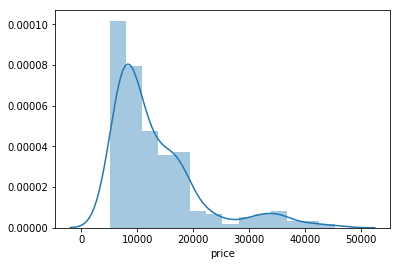

In [665]:
sns.distplot(car['price']);

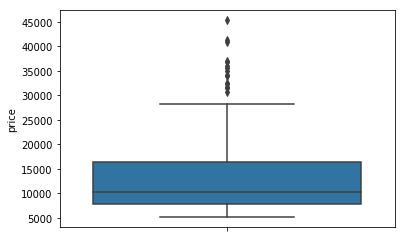

In [666]:
sns.boxplot(y=car['price'])

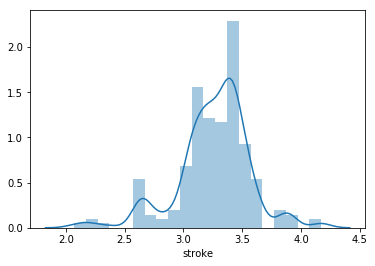

In [667]:
sns.distplot(car['stroke']);

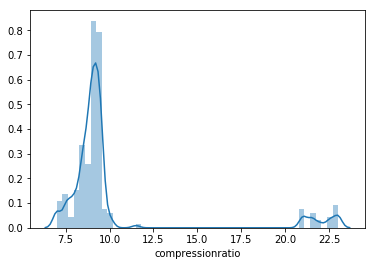

In [668]:
sns.distplot(car['compressionratio']);

In [669]:
## Check categorial and numarical features
cat_var = car.dtypes[car.dtypes == "object"].index
num_var = car.dtypes[car.dtypes != "object"].index
print("Categorial featuers are", cat_var)
print("----"*20)
print("Numarical variables are", num_var)

Categorial featuers are Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
--------------------------------------------------------------------------------
Numarical variables are Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


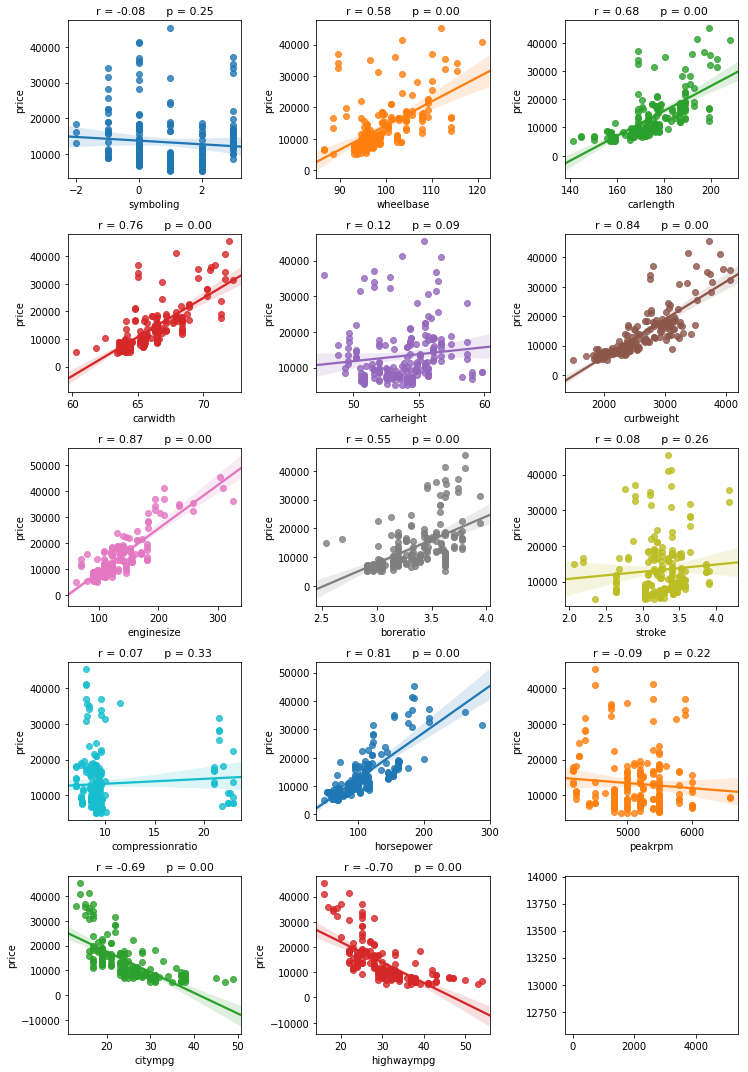

In [670]:
nr_rows = 5
nr_cols = 3
target = 'price'
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(num_var)
li_not_plot = ['car_ID', 'price']
li_plot_num_feats = [c for c in list(num_var) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(car[li_plot_num_feats[i]], car[target], ax = axs[r][c])
            stp = stats.pearsonr(car[li_plot_num_feats[i]], car[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=8)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [671]:
## Lets work with catogrial variables
cat_var

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [672]:
car[cat_var].head(10)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [673]:
car['CarName'].head(10)

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [674]:
## Seprate Car name and Car model 
car['brandname'] = car['CarName'].apply(lambda x : x.split(" ")).map(lambda x :x[0])

In [675]:
car[['CarName','brandname']].groupby('brandname').size()

brandname
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
dtype: int64

In [676]:
## Problem with some company names correct miss spelling of car name
#porcshce - porsche         
#toyouta -  toyota         
#vokswagen - volkswagen  
#vw        - volkswagen
car['brandname'] =  car['brandname'].replace('porcshce','porsche')
car['brandname'] =  car['brandname'].replace('toyouta','toyota')
car['brandname'] =  car['brandname'].replace('vokswagen','volkswagen')
car['brandname'] =  car['brandname'].replace('vw','volkswagen')
car['brandname'] = car['brandname'].apply(lambda x : x.lower())
car[['CarName','brandname']].groupby('brandname').size()


brandname
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
dtype: int64

<Figure size 720x864 with 0 Axes>

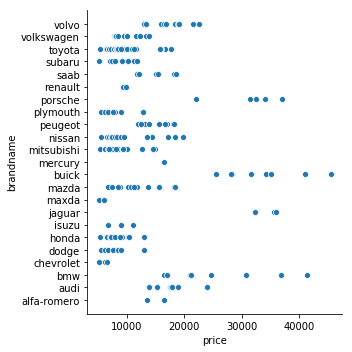

In [677]:
plt.figure(figsize=(10,12))
sns.relplot(x='price', y='brandname', data=car)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

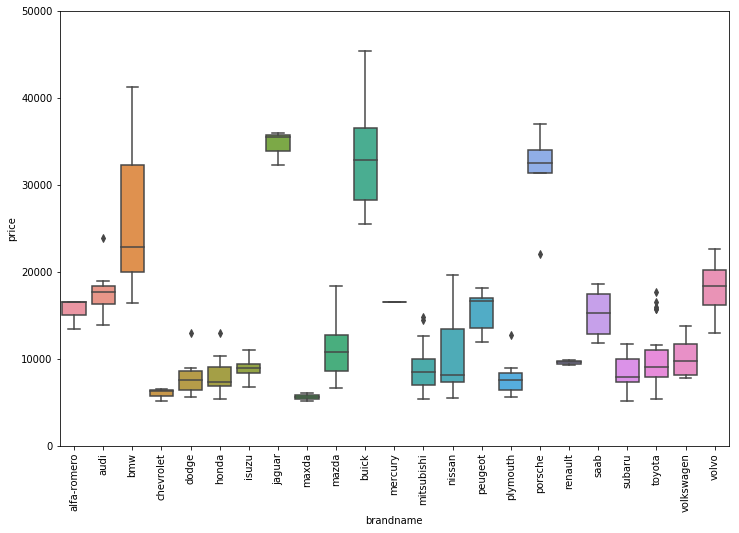

In [678]:
var = 'brandname'
data = pd.concat([car['price'], car[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="price", data=car)
fig.axis(ymin=0, ymax=50000);
plt.xticks(rotation=90)

In [679]:
car[['brandname','price']].groupby(['brandname'])[['price']].mean().sort_values('price', ascending=False)

,price
brandname,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [680]:
## No need of columns "car_ID" and "CarName" , carname has been converted to the "Brandname"
car = car.drop(['CarName','car_ID'],axis=1)

In [681]:
## Create dummy variables of "brandname" feature
brandname_singnal = pd.get_dummies(car['brandname'], drop_first=True)
car = pd.concat([car,brandname_singnal], axis =1)
car = car.drop('brandname', axis=1)
car.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,0,0,0,0,0,0,0,0,0,0
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,0,0,0,0,0,0,0,0,0,0


In [682]:
car[['fueltype']].groupby('fueltype').size()

fueltype
diesel     20
gas       185
dtype: int64

<Figure size 720x864 with 0 Axes>

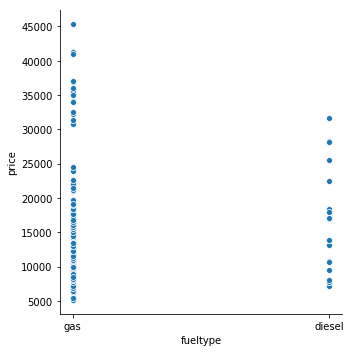

In [683]:
plt.figure(figsize=(10,12))
sns.relplot(x='fueltype', y='price', data=car)
plt.show()

In [684]:
## Convert Fueltype to numarical variable

varlist =  ['fueltype']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [685]:
car['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

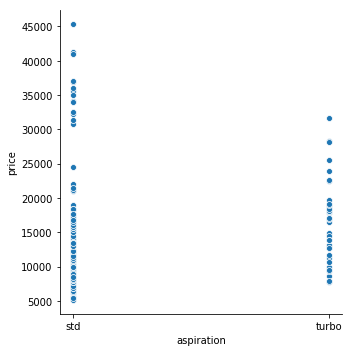

In [686]:
sns.relplot(x='aspiration', y='price', data=car)
plt.show()

In [687]:
### Convert "Aspiration" variable to numarical variable
varlist =  ['aspiration']

# Defining the map function
def binary_map(x):
    return x.map({'std': 1, "turbo": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [688]:
# doornumber carbody drivewheel
car['doornumber'].value_counts()


four    115
two      90
Name: doornumber, dtype: int64

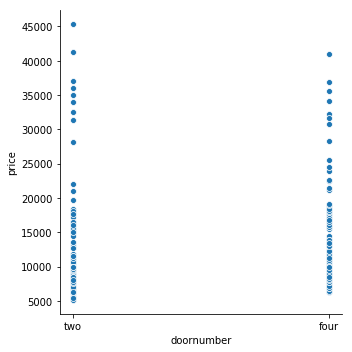

In [689]:
sns.relplot(x='doornumber', y='price', data=car)
plt.show()

In [690]:
## Convert "doornumber" feature to numarical variable
varlist =  ['doornumber']

# Defining the map function
def binary_map(x):
    return x.map({'two': 1, "four": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

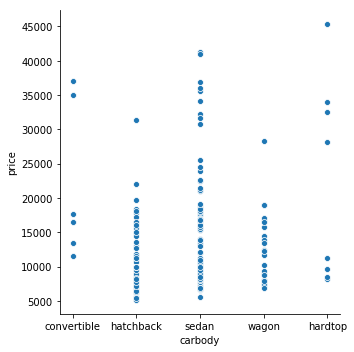

In [691]:
sns.relplot(x='carbody', y='price', data=car)
plt.show()

In [692]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'status'
status = pd.get_dummies(car['carbody'] , drop_first=True)


In [693]:
status.head(5)

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [694]:
car = pd.concat([car,status], axis=1)

In [695]:
car.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,3,1,1,1,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,0,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [696]:
car = car.drop('carbody', axis=1)

In [697]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

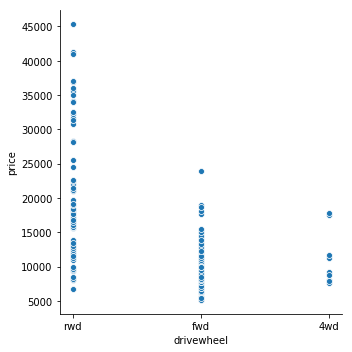

In [698]:
sns.relplot(x='drivewheel', y='price', data=car)
plt.show()

In [699]:
## Get dummy variable of feature "drivewheel"
status = pd.get_dummies(car['drivewheel'], drop_first=True)
car = pd.concat([car,status], axis=1)
car.head(5)

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,1,1,1,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,1,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,rwd,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,0,fwd,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,1,0,1,0
4,2,1,1,0,4wd,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,1,0,0,0


In [700]:
car = car.drop('drivewheel', axis=1)

In [701]:
car['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

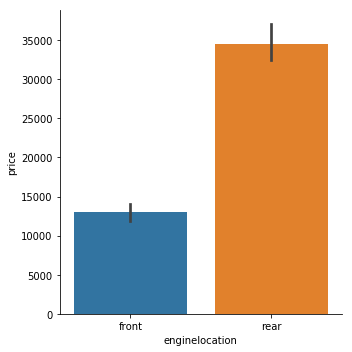

In [702]:
sns.catplot(x="enginelocation", y="price",kind="bar", data=car);

In [703]:
## convert feature "Enginelocation" to numarical variable 
varlist =  ['enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'front': 1, "rear": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [704]:
car["enginetype"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [705]:
car["enginetype"] = car["enginetype"].replace('dohcv','ohcv')
car["enginetype"].value_counts()

ohc      148
ohcf      15
ohcv      14
dohc      12
l         12
rotor      4
Name: enginetype, dtype: int64

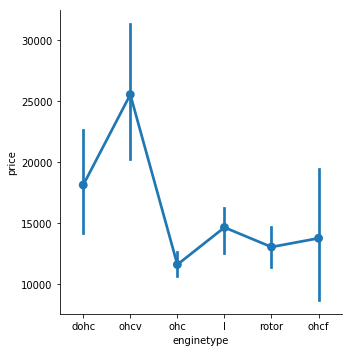

In [706]:
sns.catplot(x="enginetype", y="price", kind = 'point', data=car);

In [707]:
## create dummy variable of enginetype
status = pd.get_dummies(car['enginetype'], drop_first=True)
car = pd.concat([car,status], axis=1)
car = car.drop('enginetype', axis=1)
car.head(5)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,1,0,0,1,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,1,0,0,0


In [708]:
car.columns.values

array(['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [709]:
#cylindernumber
#fuelsystem

car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

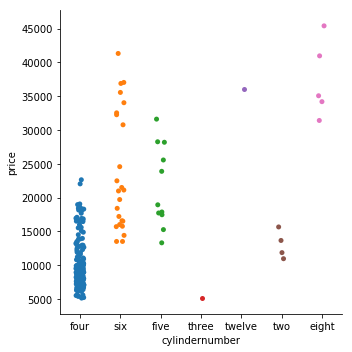

In [710]:
sns.catplot(x="cylindernumber", y="price", data=car);

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

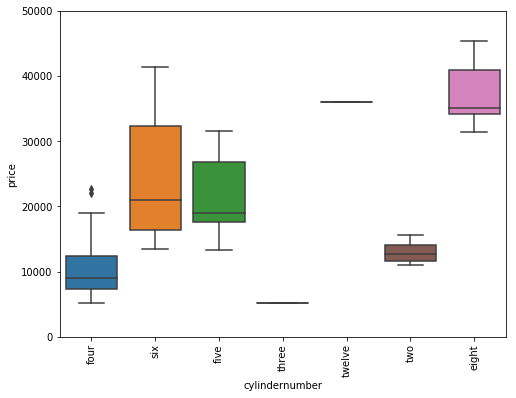

In [711]:
var = "cylindernumber"
data = pd.concat([car['price'], car[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=car)
fig.axis(ymin=0, ymax=50000);
plt.xticks(rotation=90)

In [712]:
## Create Numarical value of ordinal catagorial variable "cylindernumber"
varlist =  ['cylindernumber']

# Defining the map function
def binary_map(x):
    return x.map({'four': 4, "six": 6, 'five':5 , 'three':3 , 'twelve':12, 'two':2 , 'eight':8 })

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [713]:
#status = pd.get_dummies(car['cylindernumber'] , drop_first=True)
#car = pd.concat([car, status], axis=1)
#car = car.drop('cylindernumber', axis=1)
#car.head(10)

In [714]:
#fuelsystem
car['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

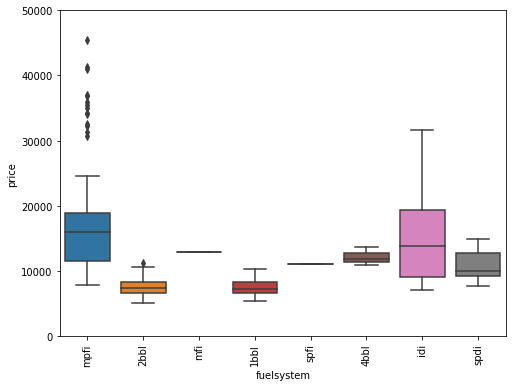

In [715]:
var = "fuelsystem"
data = pd.concat([car['price'], car[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=car)
fig.axis(ymin=0, ymax=50000);
plt.xticks(rotation=90)

In [716]:
status = pd.get_dummies(car['fuelsystem'], drop_first=True)
car = pd.concat([car,status], axis=1)
car = car.drop('fuelsystem', axis=1)
car.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,0,0,0,0,0,0,0,1,0,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,0,0,0,0,0,0,0,1,0,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,0,0,0,0,0,0,0,1,0,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,0,0,0,0,0,0,0,1,0,0


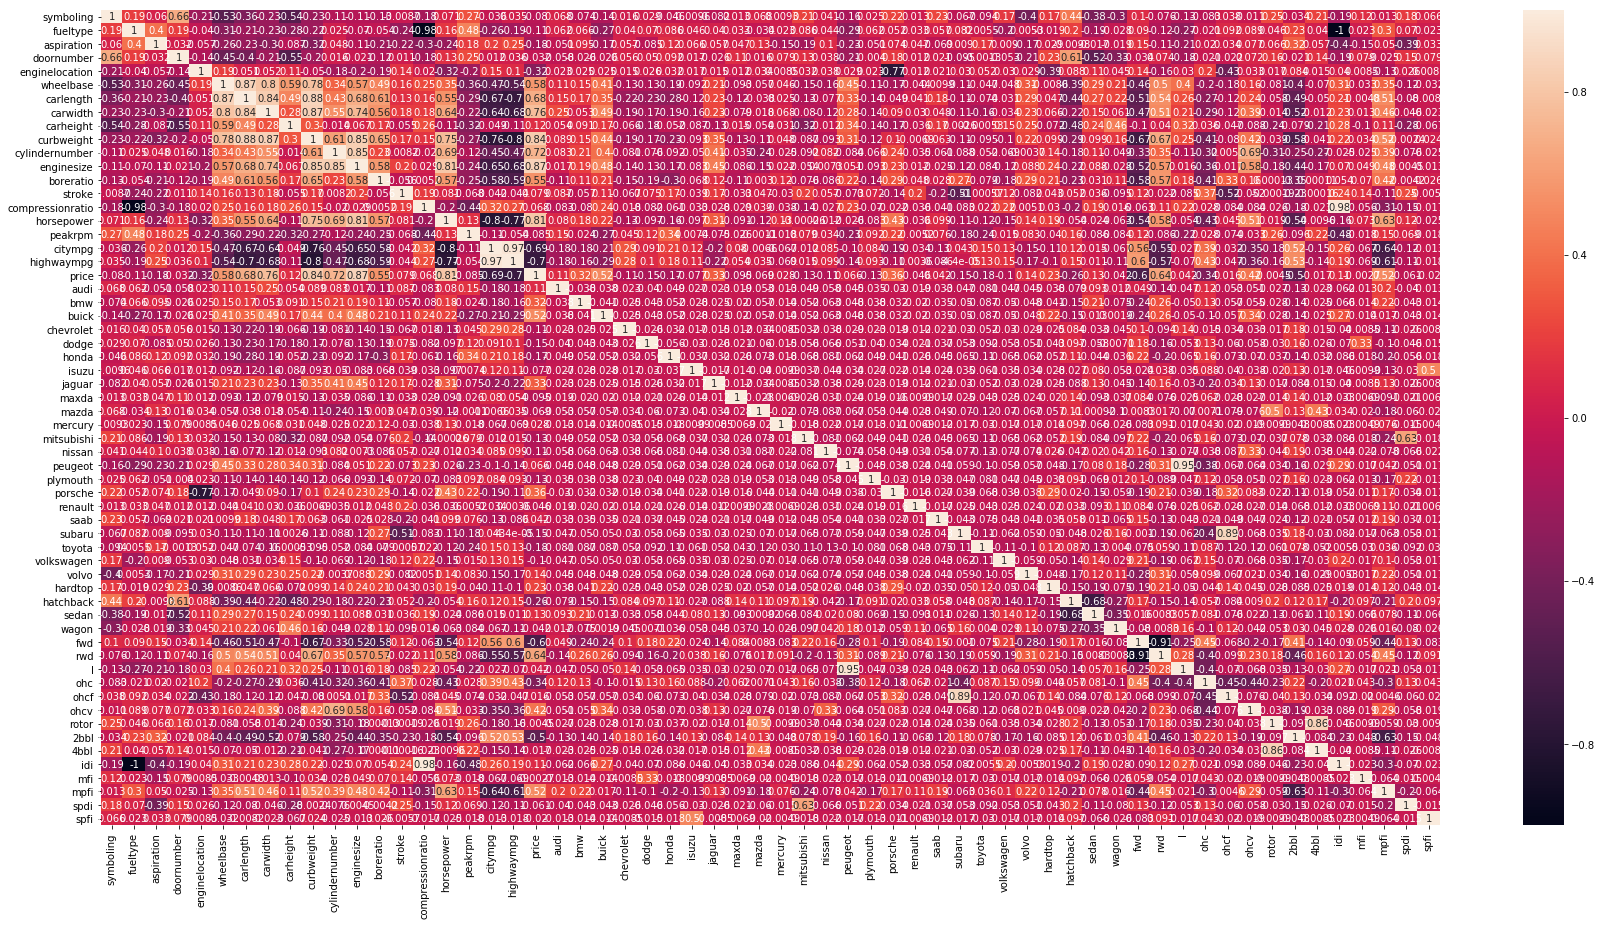

In [717]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(car.corr(),annot = True)

In [718]:
## Since citympg and highwaympg very corelated to eachother and to avoide multicollinearty , we are going to drop it.
car = car.drop(['citympg','idi','rotor','peugeot'], axis=1)

### Splitting the Data into Training and Testing Sets

In [837]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car, train_size = 0.9, test_size = 0.1, random_state = 60)

## Scaling features

In [838]:
## Rescaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [839]:
num_var

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [840]:
var = ['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm','highwaympg',
       'price']
car_train = df_train

car_train[var] = scaler.fit_transform(car_train[var])

In [841]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,2bbl,4bbl,mfi,mpfi,spdi,spfi
27,0.6,1,0,1,1,0.206997,0.241791,0.291667,0.233333,0.272692,...,0,1,0,0,0,0,0,1,0,0
154,0.4,1,1,0,1,0.265306,0.426866,0.275000,0.941667,0.311094,...,0,1,0,0,1,0,0,0,0,0
114,0.4,0,0,0,1,0.804665,0.862687,0.675000,0.908333,0.774631,...,1,0,0,0,0,0,0,0,0,0
46,0.8,1,1,1,1,0.274052,0.470149,0.408333,0.300000,0.483320,...,0,1,0,0,0,0,0,0,0,1
106,0.6,1,1,1,1,0.367347,0.558209,0.633333,0.158333,0.640419,...,0,0,0,1,0,0,0,1,0,0


In [842]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,2bbl,4bbl,mfi,mpfi,spdi,spfi
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000
mean,0.558696,0.902174,0.820652,0.429348,0.983696,0.358949,0.492537,0.466078,0.501223,0.413748,...,0.065217,0.728261,0.070652,0.070652,0.331522,0.005435,0.0,0.467391,0.043478,0.005435
std,0.242100,0.297890,0.384690,0.496334,0.126989,0.175616,0.185533,0.179205,0.198376,0.203354,...,0.247583,0.446070,0.256942,0.256942,0.472045,0.073721,0.0,0.500297,0.204488,0.073721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.230321,0.376119,0.308333,0.350000,0.254849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.309038,0.479104,0.433333,0.525000,0.357642,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.460641,0.628358,0.531250,0.643750,0.568076,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


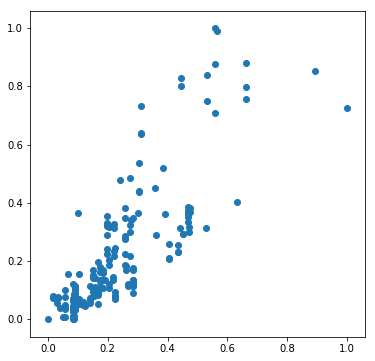

In [843]:
plt.figure(figsize=[6,6])
plt.scatter(car_train.horsepower, car_train.price)
plt.show()

Putting feature variable in X and Response variable to Y

In [844]:
print(x_car[['mfi']].isnull().sum().any())

False


In [845]:
y_car = car_train.pop('price')
x_car = car_train

In [846]:
x_car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc',
       'ohcf', 'ohcv', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Runing first model lr_1 for whole features, here We are going to backword elemination method to select features

In [847]:
import statsmodels.api as sm

x_car_lm = sm.add_constant(x_car)
lr_1 = sm.OLS(y_car,x_car_lm).fit()
#lr_1.params

In [848]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.35
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.70e-73
Time:                        13:37:41   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -544.3
Df Residuals:                     130   BIC:                            -370.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2469      0.148  

In [851]:
x_car = x_car.drop('mfi', axis=1)

In [855]:
## Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [856]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
4,enginelocation,2951.36
35,subaru,210.76
47,ohcf,195.56
1,fueltype,171.24
14,compressionratio,147.55
11,enginesize,62.91
9,curbweight,39.86
51,mpfi,37.56
15,horsepower,35.67
49,2bbl,29.77


In [857]:
x_car_lm = sm.add_constant(x_car)
lr_1 = sm.OLS(y_car,x_car_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.35
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.70e-73
Time:                        13:51:48   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -544.3
Df Residuals:                     130   BIC:                            -370.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2469      0.148  

In [858]:
## Droping featue on the base on VIF value and high P-Value
x_car = x_car.drop('enginelocation' , axis=1)

In [859]:
# Running Second model after elemenate one above feature, Model name "lr_2"
#x_car_lm = x_car.columns
x_car_lm = sm.add_constant(x_car)
lr_2 = sm.OLS(y_car,x_car_lm).fit()
#lr_2.params

In [860]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.35
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.70e-73
Time:                        13:52:57   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -544.3
Df Residuals:                     130   BIC:                            -370.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1623      0.198  

In [861]:
## Droping next featue on the base of P-Value
x_car = x_car.drop('chevrolet', axis=1)

In [862]:
x_car_lm = sm.add_constant(x_car)
lr_3 = sm.OLS(y_car,x_car_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     68.15
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           8.06e-74
Time:                        13:53:17   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -546.3
Df Residuals:                     131   BIC:                            -375.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1622      0.196  

In [863]:
# "l" engine type has very p-Value so we are droping it.
x_car = x_car.drop('ohcv', axis=1)

In [864]:
x_car_lm = sm.add_constant(x_car)
lr_4 = sm.OLS(y_car,x_car_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     70.01
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           9.57e-75
Time:                        13:53:37   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -548.3
Df Residuals:                     132   BIC:                            -381.1
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1641      0.190  

In [865]:
## On the base of P-Value , Eleminating P-Value
x_car = x_car.drop('rwd', axis=1)

In [866]:
x_car_lm = sm.add_constant(x_car)
lr_6 = sm.OLS(y_car,x_car_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     71.95
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.12e-75
Time:                        13:53:59   Log-Likelihood:                 326.13
No. Observations:                 184   AIC:                            -550.3
Df Residuals:                     133   BIC:                            -386.3
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1637      0.189  

In [867]:
## will consider it later ,  maxdata has very high p-Value
x_car = x_car.drop('spdi', axis=1)

In [868]:
x_car_lm = sm.add_constant(x_car)
lr_7 = sm.OLS(y_car,x_car_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     73.88
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.40e-76
Time:                        13:54:21   Log-Likelihood:                 326.02
No. Observations:                 184   AIC:                            -552.0
Df Residuals:                     134   BIC:                            -391.3
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1725      0.187  

In [869]:
x_car = x_car.drop('symboling', axis=1)

In [870]:
x_car_lm = sm.add_constant(x_car)
lr_8 = sm.OLS(y_car,x_car_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     75.93
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.67e-77
Time:                        13:54:54   Log-Likelihood:                 325.96
No. Observations:                 184   AIC:                            -553.9
Df Residuals:                     135   BIC:                            -396.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1780      0.186  

In [871]:
x_car = x_car.drop('stroke', axis=1)

In [872]:

x_car_lm = sm.add_constant(x_car)
lr_9 = sm.OLS(y_car,x_car_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.06
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.97e-78
Time:                        13:55:23   Log-Likelihood:                 325.88
No. Observations:                 184   AIC:                            -555.8
Df Residuals:                     136   BIC:                            -401.4
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2030      0.168  

In [873]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
0,fueltype,522.93
8,cylindernumber,273.83
9,enginesize,176.38
7,curbweight,171.53
4,carlength,166.93
5,carwidth,93.48
12,horsepower,90.15
3,wheelbase,80.31
10,boreratio,76.49
11,compressionratio,75.77


In [874]:
## Running modle number 10
x_car_lm = sm.add_constant(x_car)
lr_10 = sm.OLS(y_car,x_car_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.06
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.97e-78
Time:                        13:56:36   Log-Likelihood:                 325.88
No. Observations:                 184   AIC:                            -555.8
Df Residuals:                     136   BIC:                            -401.4
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2030      0.168  

In [875]:
## "Fueltype" feature has very high VIF value (multicollinearity) and highy p-value
x_car = x_car.drop('fueltype', axis=1)

In [880]:
x_car_lm = sm.add_constant(x_car)
lr_11 = sm.OLS(y_car,x_car_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     81.99
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.31e-80
Time:                        13:58:06   Log-Likelihood:                 325.09
No. Observations:                 184   AIC:                            -558.2
Df Residuals:                     138   BIC:                            -410.3
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0898      0.095  

In [876]:
x_car = x_car.drop('isuzu', axis=1)

In [881]:
x_car_lm = sm.add_constant(x_car)
lr_12 = sm.OLS(y_car,x_car_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     81.99
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.31e-80
Time:                        13:58:20   Log-Likelihood:                 325.09
No. Observations:                 184   AIC:                            -558.2
Df Residuals:                     138   BIC:                            -410.3
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0898      0.095  

In [882]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
3,carlength,165.80
7,cylindernumber,155.43
6,curbweight,155.23
8,enginesize,139.82
4,carwidth,91.98
11,horsepower,88.21
2,wheelbase,79.71
9,boreratio,60.47
5,carheight,39.35
13,highwaympg,37.16


In [883]:
x_car = x_car.drop('honda', axis=1)

In [884]:
x_car_lm = sm.add_constant(x_car)
lr_13 = sm.OLS(y_car,x_car_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     84.45
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.67e-81
Time:                        13:59:01   Log-Likelihood:                 325.08
No. Observations:                 184   AIC:                            -560.2
Df Residuals:                     139   BIC:                            -415.5
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0913      0.093  

In [885]:
x_car = x_car.drop('mpfi', axis=1)

In [886]:
## "cylindernumber" -- decrease the accuracy
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     87.03
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.99e-82
Time:                        14:00:10   Log-Likelihood:                 325.07
No. Observations:                 184   AIC:                            -562.1
Df Residuals:                     140   BIC:                            -420.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0926      0.092  

In [887]:
x_car = x_car.drop('compressionratio', axis=1)

In [888]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     89.74
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.24e-83
Time:                        14:00:33   Log-Likelihood:                 325.07
No. Observations:                 184   AIC:                            -564.1
Df Residuals:                     141   BIC:                            -425.9
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0920      0.091      1.

In [889]:
x_car = x_car.drop('renault', axis=1)

In [890]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     92.48
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.80e-84
Time:                        14:01:23   Log-Likelihood:                 324.98
No. Observations:                 184   AIC:                            -566.0
Df Residuals:                     142   BIC:                            -430.9
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0946      0.090      1.

In [891]:
x_car = x_car.drop('maxda', axis=1)

In [892]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     95.28
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.67e-85
Time:                        14:02:20   Log-Likelihood:                 324.81
No. Observations:                 184   AIC:                            -567.6
Df Residuals:                     143   BIC:                            -435.8
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1002      0.089      1.

In [893]:
x_car = x_car.drop('nissan', axis=1)

In [894]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     98.17
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.90e-86
Time:                        14:02:46   Log-Likelihood:                 324.60
No. Observations:                 184   AIC:                            -569.2
Df Residuals:                     144   BIC:                            -440.6
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1019      0.089      1.

In [895]:
x_car = x_car.drop('mercury', axis=1)

In [896]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           8.81e-87
Time:                        14:03:08   Log-Likelihood:                 324.44
No. Observations:                 184   AIC:                            -570.9
Df Residuals:                     145   BIC:                            -445.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0949      0.088      1.

In [897]:
x_car = x_car.drop('spfi', axis=1)

In [898]:
x_car_lm = sm.add_constant(x_car)
lr_14 = sm.OLS(y_car,x_car_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.04e-87
Time:                        14:03:59   Log-Likelihood:                 324.18
No. Observations:                 184   AIC:                            -572.4
Df Residuals:                     146   BIC:                            -450.2
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0917      0.088      1.

In [899]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
3,carlength,149.06
7,cylindernumber,142.55
6,curbweight,132.56
8,enginesize,113.32
4,carwidth,85.36
2,wheelbase,67.02
10,horsepower,52.78
9,boreratio,50.67
29,sedan,35.95
5,carheight,34.32


In [901]:
x_car = x_car.drop('toyota',axis=1)

In [902]:
x_car_lm = sm.add_constant(x_car)
lr_15 = sm.OLS(y_car,x_car_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     107.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.15e-88
Time:                        14:04:53   Log-Likelihood:                 324.00
No. Observations:                 184   AIC:                            -574.0
Df Residuals:                     147   BIC:                            -455.0
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0991      0.086      1.

In [903]:
x_car = x_car.drop('doornumber', axis=1)

In [904]:
x_car_lm = sm.add_constant(x_car)
lr_15 = sm.OLS(y_car,x_car_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     111.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.39e-89
Time:                        14:05:20   Log-Likelihood:                 323.67
No. Observations:                 184   AIC:                            -575.3
Df Residuals:                     148   BIC:                            -459.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0849      0.084      1.

In [905]:
x_car= x_car.drop('l',axis=1)

In [906]:
x_car_lm = sm.add_constant(x_car)
lr_15 = sm.OLS(y_car,x_car_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     114.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.72e-90
Time:                        14:06:10   Log-Likelihood:                 323.31
No. Observations:                 184   AIC:                            -576.6
Df Residuals:                     149   BIC:                            -464.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0959      0.083      1.

In [407]:
#x_car['carwidth'] = car['carwidth']

In [907]:
x_car = x_car.drop('ohc', axis=1)

In [908]:
#x_car = x_car.drop('nissan', axis =1) 

In [909]:
x_car_lm = sm.add_constant(x_car)
lr_18 = sm.OLS(y_car,x_car_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     118.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.15e-91
Time:                        14:06:45   Log-Likelihood:                 322.91
No. Observations:                 184   AIC:                            -577.8
Df Residuals:                     150   BIC:                            -468.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1251      0.074      1.

In [411]:
#x_car = x_car.drop('plymouth' , axis=1)

In [910]:
x_car = x_car.drop('fwd', axis=1)

In [912]:
x_car_lm = sm.add_constant(x_car)
lr_18 = sm.OLS(y_car,x_car_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.90e-92
Time:                        14:07:35   Log-Likelihood:                 322.41
No. Observations:                 184   AIC:                            -578.8
Df Residuals:                     151   BIC:                            -472.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1112      0.072      1.

In [913]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
2,carlength,136.07
6,cylindernumber,124.00
5,curbweight,92.34
7,enginesize,89.44
3,carwidth,75.72
1,wheelbase,55.22
9,horsepower,46.93
8,boreratio,40.86
27,sedan,33.03
4,carheight,30.47


In [914]:
x_car = x_car.drop('volkswagen', axis =1)

In [915]:
x_car_lm = sm.add_constant(x_car)
lr_20 = sm.OLS(y_car,x_car_lm).fit()
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.15e-93
Time:                        14:08:13   Log-Likelihood:                 321.81
No. Observations:                 184   AIC:                            -579.6
Df Residuals:                     152   BIC:                            -476.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1149      0.072      1.

In [416]:
#x_car = x_car.drop('boreratio', axis=1)


In [916]:
x_car = x_car.drop('4bbl', axis=1)

In [917]:
x_car_lm = sm.add_constant(x_car)
lr_22 = sm.OLS(y_car,x_car_lm).fit()
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     130.2
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.17e-94
Time:                        14:08:34   Log-Likelihood:                 320.97
No. Observations:                 184   AIC:                            -579.9
Df Residuals:                     153   BIC:                            -480.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1271      0.072      1.

In [920]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
2,carlength,127.06
6,cylindernumber,97.35
5,curbweight,85.88
7,enginesize,84.23
3,carwidth,71.76
1,wheelbase,50.82
9,horsepower,38.82
8,boreratio,34.62
25,sedan,27.55
27,ohcf,26.68


In [918]:
x_car = x_car.drop('highwaympg', axis=1)

In [919]:
x_car_lm = sm.add_constant(x_car)
lr_23 = sm.OLS(y_car,x_car_lm).fit()
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     134.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.44e-94
Time:                        14:11:22   Log-Likelihood:                 319.94
No. Observations:                 184   AIC:                            -579.9
Df Residuals:                     154   BIC:                            -483.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1807      0.059      3.

In [921]:
x_car = x_car.drop('wagon', axis=1)

In [922]:
#x_car = x_car.drop('spfi', axis=1)
#x_car['spfi'] = car['spfi']

In [923]:
x_car_lm = sm.add_constant(x_car)
lr_24 = sm.OLS(y_car,x_car_lm).fit()
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           3.19e-94
Time:                        14:12:11   Log-Likelihood:                 316.03
No. Observations:                 184   AIC:                            -574.1
Df Residuals:                     155   BIC:                            -480.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1373      0.058      2.

In [924]:
x_car = x_car.drop('sedan', axis=1)

In [925]:
x_car_lm = sm.add_constant(x_car)
lr_25 = sm.OLS(y_car,x_car_lm).fit()
print(lr_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     139.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           3.36e-95
Time:                        14:12:31   Log-Likelihood:                 315.75
No. Observations:                 184   AIC:                            -575.5
Df Residuals:                     156   BIC:                            -485.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1222      0.053      2.

In [926]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
2,carlength,116.79
5,curbweight,79.61
7,enginesize,78.26
3,carwidth,70.36
6,cylindernumber,67.88
1,wheelbase,49.37
9,horsepower,38.56
8,boreratio,31.49
25,ohcf,26.37
21,subaru,23.68


In [927]:
x_car = x_car.drop('2bbl',axis=1)

In [928]:
x_car_lm = sm.add_constant(x_car)
lr_26 = sm.OLS(y_car,x_car_lm).fit()
print(lr_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.06e-95
Time:                        14:13:08   Log-Likelihood:                 312.58
No. Observations:                 184   AIC:                            -571.2
Df Residuals:                     157   BIC:                            -484.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1127      0.054      2.

In [929]:
x_car = x_car.drop('aspiration', axis=1)

In [930]:
x_car_lm = sm.add_constant(x_car)
lr_27 = sm.OLS(y_car,x_car_lm).fit()
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.28e-96
Time:                        14:13:43   Log-Likelihood:                 311.83
No. Observations:                 184   AIC:                            -571.7
Df Residuals:                     158   BIC:                            -488.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1076      0.053      2.

In [931]:
x_car = x_car.drop('peakrpm', axis=1)

In [932]:
x_car_lm = sm.add_constant(x_car)
lr_27 = sm.OLS(y_car,x_car_lm).fit()
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.85e-96
Time:                        14:14:10   Log-Likelihood:                 310.32
No. Observations:                 184   AIC:                            -570.6
Df Residuals:                     159   BIC:                            -490.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1376      0.050      2.

In [933]:
x_car = x_car.drop('plymouth', axis=1)

In [934]:
x_car_lm = sm.add_constant(x_car)
lr_28 = sm.OLS(y_car,x_car_lm).fit()
print(lr_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     152.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.53e-96
Time:                        14:14:33   Log-Likelihood:                 307.59
No. Observations:                 184   AIC:                            -567.2
Df Residuals:                     160   BIC:                            -490.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1135      0.050      2.

In [935]:
x_car = x_car.drop('dodge', axis=1)

In [936]:
x_car_lm = sm.add_constant(x_car)
lr_29 = sm.OLS(y_car,x_car_lm).fit()
print(lr_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     156.7
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.35e-97
Time:                        14:14:53   Log-Likelihood:                 305.50
No. Observations:                 184   AIC:                            -565.0
Df Residuals:                     161   BIC:                            -491.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0940      0.049      1.

In [937]:
#x_car = x_car.drop('peakrpm', axis=1)
x_car = x_car.drop('carheight', axis=1)
#x_car['honda'] = car['honda']

In [938]:
x_car_lm = sm.add_constant(x_car)
lr_30 = sm.OLS(y_car,x_car_lm).fit()
print(lr_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     158.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.46e-96
Time:                        14:15:29   Log-Likelihood:                 301.79
No. Observations:                 184   AIC:                            -559.6
Df Residuals:                     162   BIC:                            -488.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0636      0.049      1.

In [939]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,carlength,103.19
3,curbweight,67.29
2,carwidth,64.10
0,wheelbase,40.51
5,enginesize,39.52
6,boreratio,27.99
20,ohcf,23.05
4,cylindernumber,22.67
7,horsepower,19.75
16,subaru,19.69


In [940]:
x_car = x_car.drop('wheelbase', axis=1)

In [941]:
x_car_lm = sm.add_constant(x_car)
lr_31 = sm.OLS(y_car,x_car_lm).fit()
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           6.26e-97
Time:                        14:16:00   Log-Likelihood:                 299.82
No. Observations:                 184   AIC:                            -557.6
Df Residuals:                     163   BIC:                            -490.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0672      0.049      1.

In [942]:
x_car = x_car.drop('porsche', axis=1)

In [944]:
x_car_lm = sm.add_constant(x_car)
lr_31 = sm.OLS(y_car,x_car_lm).fit()
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     166.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.09e-96
Time:                        14:45:40   Log-Likelihood:                 296.28
No. Observations:                 184   AIC:                            -552.6
Df Residuals:                     164   BIC:                            -488.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0217      0.046      0.

In [945]:
x_car = x_car.drop('cylindernumber', axis=1)

In [946]:
x_car_lm = sm.add_constant(x_car)
lr_31 = sm.OLS(y_car,x_car_lm).fit()
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     172.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.63e-97
Time:                        14:46:08   Log-Likelihood:                 294.10
No. Observations:                 184   AIC:                            -550.2
Df Residuals:                     165   BIC:                            -489.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0634      0.017     -3.678      0.0

In [947]:
x_car = x_car.drop('boreratio', axis=1)

In [948]:
x_car_lm = sm.add_constant(x_car)
lr_32 = sm.OLS(y_car,x_car_lm).fit()
print(lr_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     182.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.16e-98
Time:                        14:46:25   Log-Likelihood:                 293.47
No. Observations:                 184   AIC:                            -550.9
Df Residuals:                     166   BIC:                            -493.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0700      0.016     -4.342      0.0

In [949]:
x_car = x_car.drop('enginesize', axis=1)

In [950]:
x_car_lm = sm.add_constant(x_car)
lr_32 = sm.OLS(y_car,x_car_lm).fit()
print(lr_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.26e-98
Time:                        14:46:54   Log-Likelihood:                 291.81
No. Observations:                 184   AIC:                            -549.6
Df Residuals:                     167   BIC:                            -495.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0688      0.016     -4.250      0.0

In [951]:

x_car = x_car.drop('hatchback', axis=1)

In [952]:
x_car_lm = sm.add_constant(x_car)
lr_33 = sm.OLS(y_car,x_car_lm).fit()
print(lr_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     199.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.70e-98
Time:                        14:47:33   Log-Likelihood:                 289.18
No. Observations:                 184   AIC:                            -546.4
Df Residuals:                     168   BIC:                            -494.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0869      0.014     -6.150      0.0

In [953]:
x_car = x_car.drop('hardtop', axis=1)

In [960]:
x_car_lm = sm.add_constant(x_car)
lr_34 = sm.OLS(y_car,x_car_lm).fit()
print(lr_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     215.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.99e-98
Time:                        14:49:57   Log-Likelihood:                 282.65
No. Observations:                 184   AIC:                            -537.3
Df Residuals:                     170   BIC:                            -492.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.014     -6.595      0.0

In [958]:
#x_car['carwidth'] = car['carwidth']
x_car = x_car.drop('mitsubishi', axis=1)

In [964]:
x_car_lm35 = sm.add_constant(x_car)
lr_35 = sm.OLS(y_car,x_car_lm35).fit()
print(lr_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     226.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.27e-98
Time:                        14:53:10   Log-Likelihood:                 279.29
No. Observations:                 184   AIC:                            -532.6
Df Residuals:                     171   BIC:                            -490.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.014     -7.767      0.0

In [994]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,curbweight,30.86
0,carwidth,23.34
2,horsepower,8.57
7,ohcf,5.74
6,subaru,5.48
5,jaguar,1.25
4,buick,1.20
3,bmw,1.16


In [963]:
x_car = x_car.drop('carlength', axis =1)

In [965]:
x_car_lm36 = sm.add_constant(x_car)
lr_36 = sm.OLS(y_car,x_car_lm36).fit()
print(lr_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     226.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           4.27e-98
Time:                        14:53:44   Log-Likelihood:                 279.29
No. Observations:                 184   AIC:                            -532.6
Df Residuals:                     171   BIC:                            -490.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.014     -7.767      0.0

In [966]:
x_car = x_car.drop('saab', axis =1)

In [967]:
x_car_lm37 = sm.add_constant(x_car)
lr_37 = sm.OLS(y_car,x_car_lm37).fit()
print(lr_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     241.9
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.95e-98
Time:                        14:54:39   Log-Likelihood:                 277.14
No. Observations:                 184   AIC:                            -530.3
Df Residuals:                     172   BIC:                            -491.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.014     -7.737      0.0

In [968]:
x_car = x_car.drop('mazda', axis =1)

In [969]:
x_car_lm38 = sm.add_constant(x_car)
lr_38 = sm.OLS(y_car,x_car_lm38).fit()
print(lr_38.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     257.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.60e-98
Time:                        14:55:30   Log-Likelihood:                 273.83
No. Observations:                 184   AIC:                            -525.7
Df Residuals:                     173   BIC:                            -490.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1077      0.014     -7.649      0.0

In [970]:
x_car = x_car.drop('audi', axis =1)

In [971]:
x_car_lm39 = sm.add_constant(x_car)
lr_39 = sm.OLS(y_car,x_car_lm39).fit()
print(lr_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     275.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.41e-98
Time:                        14:56:28   Log-Likelihood:                 270.02
No. Observations:                 184   AIC:                            -520.0
Df Residuals:                     174   BIC:                            -487.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1185      0.014     -8.630      0.0

In [972]:
x_car = x_car.drop('volvo', axis =1)

In [973]:
x_car_lm39 = sm.add_constant(x_car)
lr_39 = sm.OLS(y_car,x_car_lm39).fit()
print(lr_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     298.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           9.91e-98
Time:                        14:57:18   Log-Likelihood:                 266.32
No. Observations:                 184   AIC:                            -514.6
Df Residuals:                     175   BIC:                            -485.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.014     -9.198      0.0

In [1001]:
vif = pd.DataFrame()
vif['Feature'] = x_car.columns
vif['VIF'] = [variance_inflation_factor(x_car.values,i) for i in range(x_car.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,curbweight,30.86
0,carwidth,23.34
2,horsepower,8.57
7,ohcf,5.74
6,subaru,5.48
5,jaguar,1.25
4,buick,1.20
3,bmw,1.16


### Residual Analysis of the train data

In [1015]:
y_car_price39 = lr_39.predict(x_car_lm39)

Text(0.5,0,'Errors')

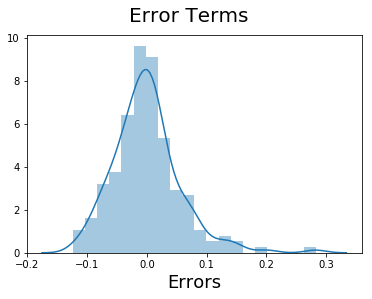

In [1016]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_car - y_car_price39), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [1017]:
#### Check R-squre for modle_35
from sklearn.metrics import mean_squared_error,r2_score
mse39 = mean_squared_error(y_car, y_car_price39)
r_squared39 = r2_score(y_car, y_car_price39)

In [1018]:
print('Mean_Squared_Error :' ,mse39)
print('r_square_value :',r_squared39)

Mean_Squared_Error : 0.003238516836317606
r_square_value : 0.9317034797553292


##  Model Evaluation  

Text(0,0.5,'y_pred')

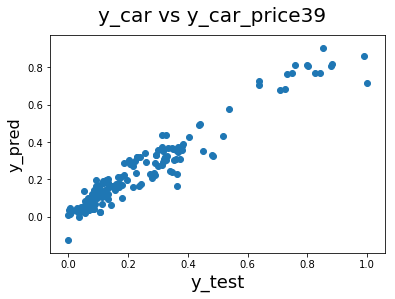

In [1019]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_car, y_car_price39)
fig.suptitle('y_car vs y_car_price39', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Text(0,0.5,'Views')

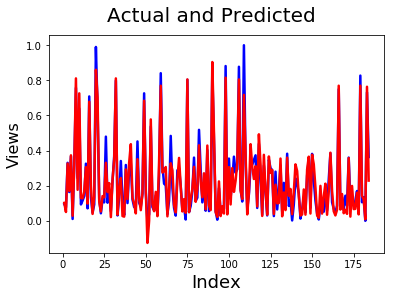

In [1020]:
## Actual vs Predicted
c = [i for i in range(1,185,1)]
fig = plt.figure()
plt.plot(c,y_car, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_car_price39, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)

Text(0,0.5,'y_car-y_car_price')

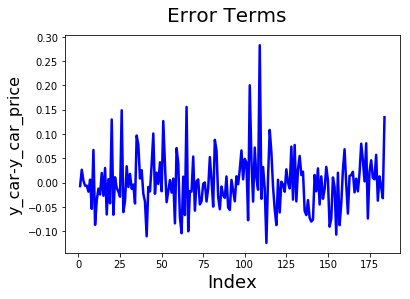

In [1021]:
# Error terms
c = [i for i in range(1,185,1)]
fig = plt.figure()
plt.plot(c,y_car-y_car_price39, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_car-y_car_price', fontsize=16) 

#  Making Predictions Using the Final Model

##### Applying the scaling on the test sets

In [1022]:
var = ['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm','highwaympg',
       'price']
car_test = df_test

car_test[var] = scaler.transform(car_test[var])

In [1023]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,2bbl,4bbl,mfi,mpfi,spdi,spfi
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,0.638095,0.904762,0.809524,0.523810,1.0,0.314730,0.485146,0.478175,0.428175,0.417249,...,0.0,0.666667,0.095238,0.047619,0.238095,0.095238,0.047619,0.380952,0.047619,0.0
std,0.300793,0.300793,0.402374,0.511766,0.0,0.174200,0.175600,0.178836,0.240464,0.194137,...,0.0,0.483046,0.300793,0.218218,0.436436,0.300793,0.218218,0.497613,0.218218,0.0
min,0.200000,0.000000,0.000000,0.000000,1.0,0.058309,0.132836,0.291667,0.083333,0.150504,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,1.000000,1.000000,0.000000,1.0,0.230321,0.394030,0.325000,0.200000,0.290147,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.600000,1.000000,1.000000,1.000000,1.0,0.271137,0.416418,0.450000,0.433333,0.411171,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.0,0.364431,0.583582,0.550000,0.608333,0.513189,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.0,0.740525,0.867164,0.975000,0.808333,0.863848,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing into X_test and y_test

In [1028]:
y_test = car_test.pop('price')
X_test = car_test[['carwidth', 'curbweight', 'horsepower', 'bmw', 'buick', 'jaguar',
       'subaru', 'ohcf']]

In [1029]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [1030]:
X_test_m4

,const,carwidth,curbweight,horsepower,bmw,buick,jaguar,subaru,ohcf
195,1.0,0.575000,0.599690,0.275000,0,0,0,0,0
37,1.0,0.408333,0.290147,0.158333,0,0,0,0,0
92,1.0,0.291667,0.174554,0.087500,0,0,0,0,0
147,1.0,0.425000,0.375097,0.191667,0,0,0,1,1
148,1.0,0.425000,0.361521,0.141667,0,0,0,1,1
53,1.0,0.325000,0.177269,0.083333,0,0,0,0,0
21,1.0,0.291667,0.150504,0.083333,0,0,0,0,0
74,1.0,0.975000,0.863848,0.566667,0,1,0,0,0
55,1.0,0.450000,0.346005,0.220833,0,0,0,0,0
83,1.0,0.500000,0.555857,0.404167,0,0,0,0,0


In [1031]:
# Making predictions using the fourth model
y_pred_m39 = lr_39.predict(X_test_m4)

##  Model Evaluation of test datafram and predicted model
Now Predicted model is ready here

## calculate the R-squared score on the test set.

In [1035]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m39)

0.8692556800752789

Text(0,0.5,'y_pred')

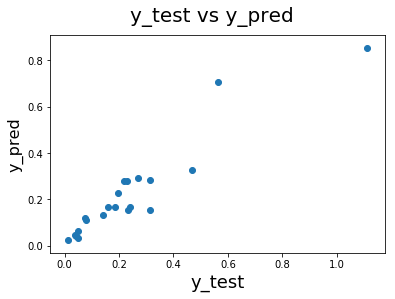

In [1032]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m39)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [1034]:
#y_pred_m39

## REF Method

In [987]:
x_car_ref = df_train

In [988]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [989]:
# Running RFE with the output number of the variable equal to 10
lm_ref = LinearRegression()
lm_ref.fit(x_car_ref, y_car)

rfe = RFE(lm_ref, 15)             # running RFE
rfe = rfe.fit(x_car_ref, y_car)

In [990]:
list(zip(x_car_ref.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', False, 11),
 ('aspiration', False, 25),
 ('doornumber', False, 36),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('cylindernumber', False, 20),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', False, 29),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('highwaympg', True, 1),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 41),
 ('dodge', False, 17),
 ('honda', False, 32),
 ('isuzu', False, 28),
 ('jaguar', True, 1),
 ('maxda', False, 27),
 ('mazda', False, 13),
 ('mercury', False, 23),
 ('mitsubishi', False, 15),
 ('nissan', False, 30),
 ('plymouth', False, 16),
 ('porsche', False, 7),
 ('renault', False, 31),
 ('saab', False, 2),
 ('subaru', True, 1),
 ('toyota', False, 26),
 ('volkswagen', False, 24),
 ('volvo', False, 8),
 ('hardtop', False, 3)

In [991]:
col = x_car_ref.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'horsepower', 'highwaympg', 'audi', 'bmw', 'buick',
       'jaguar', 'subaru', 'ohcf', '4bbl'],
      dtype='object')

In [992]:
 x_car_ref.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'cylindernumber', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'porsche', 'renault', 'saab',
       'toyota', 'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcv', '2bbl', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [993]:
x_train_rfe = x_car_ref[col]

In [251]:
y_train = y_car

In [252]:
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [254]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [255]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     182.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.40e-103
Time:                        09:10:09   Log-Likelihood:                 321.86
No. Observations:                 205   AIC:                            -611.7
Df Residuals:                     189   BIC:                            -558.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2713      0.055      4.

In [256]:
x_train_new = x_train_rfe.drop('4bbl', axis=1)

In [257]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(x_train_new)

In [258]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [259]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     192.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          5.35e-104
Time:                        09:12:23   Log-Likelihood:                 320.02
No. Observations:                 205   AIC:                            -610.0
Df Residuals:                     190   BIC:                            -560.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2806      0.055      5.

In [260]:
x_train_new2 = x_train_new.drop('enginesize', axis=1)

In [261]:
x_train_lm = sm.add_constant(x_train_new2)

In [265]:
lm_ref2 = sm.OLS(y_train, x_train_lm).fit()

In [266]:
print(lm_ref2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     206.5
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          7.71e-105
Time:                        09:23:07   Log-Likelihood:                 319.21
No. Observations:                 205   AIC:                            -610.4
Df Residuals:                     191   BIC:                            -563.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2902      0.054      5.

In [273]:
x_train_new3 = x_train_new2.drop('wheelbase', axis=1)

In [274]:
x_train_lm = sm.add_constant(x_train_new3)

In [275]:
lm_ref3 = sm.OLS(y_train, x_train_lm).fit()

In [276]:
print(lm_ref3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     222.0
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.56e-105
Time:                        09:41:18   Log-Likelihood:                 318.00
No. Observations:                 205   AIC:                            -610.0
Df Residuals:                     192   BIC:                            -566.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2846      0.054      5.

In [277]:
x_train_new4 = x_train_new3.drop('porsche', axis=1)
x_train_lm = sm.add_constant(x_train_new4)
lm_ref4 = sm.OLS(y_train, x_train_lm).fit()
print(lm_ref4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.22e-105
Time:                        09:42:06   Log-Likelihood:                 315.30
No. Observations:                 205   AIC:                            -606.6
Df Residuals:                     193   BIC:                            -566.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3657      0.041      8.

In [280]:
#x_train_new5['sedand'] = x_train_new4['sedan']
x_train_new5 = x_train_new4.drop('hardtop', axis=1)
x_train_lm = sm.add_constant(x_train_new5)
lm_ref5 = sm.OLS(y_train, x_train_lm).fit()
print(lm_ref5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     249.6
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          5.11e-105
Time:                        09:46:13   Log-Likelihood:                 310.81
No. Observations:                 205   AIC:                            -599.6
Df Residuals:                     194   BIC:                            -563.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3074      0.037      8.

In [282]:
x_train_new6 = x_train_new5.drop('sedan', axis=1)
x_train_lm = sm.add_constant(x_train_new6)
lm_ref6 = sm.OLS(y_train, x_train_lm).fit()
print(lm_ref6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     273.7
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.57e-105
Time:                        09:47:52   Log-Likelihood:                 309.05
No. Observations:                 205   AIC:                            -598.1
Df Residuals:                     195   BIC:                            -564.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3038      0.037      8.

In [283]:
x_train_new7 = x_train_new6.drop('hatchback', axis=1)
x_train_lm = sm.add_constant(x_train_new7)
lm_ref7 = sm.OLS(y_train, x_train_lm).fit()
print(lm_ref7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     303.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          4.64e-106
Time:                        09:49:44   Log-Likelihood:                 307.29
No. Observations:                 205   AIC:                            -596.6
Df Residuals:                     196   BIC:                            -566.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3083      0.037      8.

In [284]:
x_train_new8 = x_train_new7.drop('wagon', axis=1)
x_train_lm = sm.add_constant(x_train_new8)
lm_ref8 = sm.OLS(y_train, x_train_lm).fit()
print(lm_ref8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     340.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          2.07e-106
Time:                        09:50:44   Log-Likelihood:                 305.04
No. Observations:                 205   AIC:                            -594.1
Df Residuals:                     197   BIC:                            -567.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3060      0.037      8.

In [285]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.82
3,curbweight,6.09
2,carwidth,4.64
4,horsepower,3.01
6,buick,1.42
1,enginelocation,1.31
7,jaguar,1.24
5,bmw,1.10


In [287]:
y_trainrfe_price = lm_ref8.predict(x_train_lm)

Text(0.5,0,'Errors')

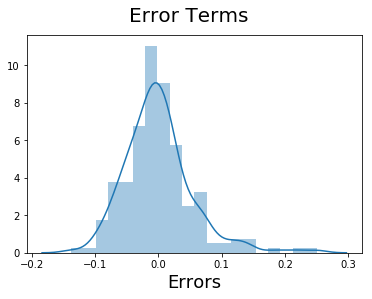

In [288]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_trainrfe_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)